In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./strava-activity.csv.bz2')

In [3]:
data.head()

,name,athlete.sex,athlete.country,start_date_local,distance,achievement_count,type,kudos_count
0,"Mitro"""" :)",F,Ecuador,2014-08-27T15:55:26Z,21580.0,6,Ride,0
1,Ochtendrit,M,The Netherlands,2015-08-04T09:25:02Z,19092.8,0,Ride,0
2,Enough time for a quick and hot 14,M,United States,2015-05-17T14:38:04Z,23023.4,8,Ride,4
3,Ilkley Grassington Buckden and back,F,United Kingdom,2014-05-26T09:20:53Z,101702.0,11,Ride,6
4,Morning Short hike,F,United States,2013-12-19T09:05:16Z,2739.8,0,Hike,0


In [6]:
usca = data.drop('name', axis=1)[data['athlete.country'].isin(['United States', 'Canada'])]

In [7]:
usca = usca[usca.distance > 1000]

In [8]:
usca.shape

(2529, 7)

In [9]:
import matplotlib.pyplot as plt

(array([2.48e+03, 4.50e+01, 3.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([  1005. ,  94746.6, 188488.2, 282229.8, 375971.4, 469713. ,
        563454.6, 657196.2, 750937.8, 844679.4, 938421. ]),
 <a list of 10 Patch objects>)

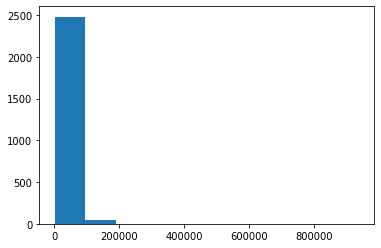

In [10]:
plt.hist(usca.distance)

In [11]:
usca['ld'] = np.log(usca.distance)

(array([102., 276., 603., 574., 436., 377., 137.,  22.,   1.,   1.]),
 array([ 6.91274282,  7.59666393,  8.28058505,  8.96450616,  9.64842727,
        10.33234839, 11.0162695 , 11.70019061, 12.38411173, 13.06803284,
        13.75195395]),
 <a list of 10 Patch objects>)

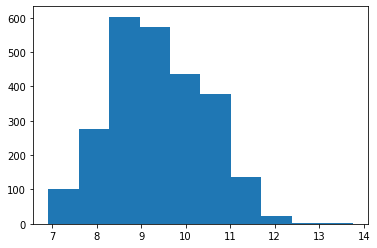

In [12]:
plt.hist(usca.ld)

In [13]:
np.mean(usca.ld)

9.365094779114187

In [14]:
np.var(usca.ld)

1.1009310043502714

In [15]:
np.std(usca.ld)

1.04925259320636

In [16]:
usca.groupby('athlete.country').ld.mean()

athlete.country
Canada           9.244502
United States    9.377159
Name: ld, dtype: float64

In [17]:
usca.groupby('athlete.country').size()

athlete.country
Canada            230
United States    2299
dtype: int64

In [18]:
us = np.random.normal(9.36, 1.049, size = 2299)

In [19]:
ca = np.random.normal(9.36, 1.049, size=230)

In [20]:
np.mean(us) - np.mean(ca)

0.05759643090436306

In [21]:
diffs = [np.mean(np.random.normal(9.36, 1.049, size = 2299)) - np.mean(np.random.normal(9.36, 1.049, size=230)) for i in range(1000)]

In [22]:
diffs = np.array(diffs)

In [23]:
np.max(diffs)

0.2420330379773965

In [24]:
np.min(diffs)

-0.22512799518093018

In [25]:
np.quantile(diffs, [0.025, 0.975])

array([-0.14874545,  0.14945481])

In [26]:
np.quantile(diffs, [0.05, 0.95])

array([-0.12945103,  0.12214598])

In [27]:
np.mean(diffs > 0.133)

0.04

In [28]:
np.mean(diffs)

-0.0009121510360751905